<a href="https://colab.research.google.com/github/Jordan3448/ComputerVision/blob/main/cvzone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use colab Code Snippets to grab an image from the webcam.

We will then download an image of Niagara Falls using !wget.

Next we will use [cvzone](https://github.com/cvzone/cvzone) to do human body segmentation, and overlay the body onto the falls.

**cvzone** is a python module available as a github repository.

**git** is a program for a version control system. THe containers that git places iles and their version histories and comments is called a *repository*.

**Github** is a website offering free public hosting of your repositories. It also has a nice interface for displaying jupyter notebooks.

<hr>



###Install a Google Code snippet for webcam captures.

Go to menu: Insert -> Code Snippets -> Camera Capture -> click on the +  

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


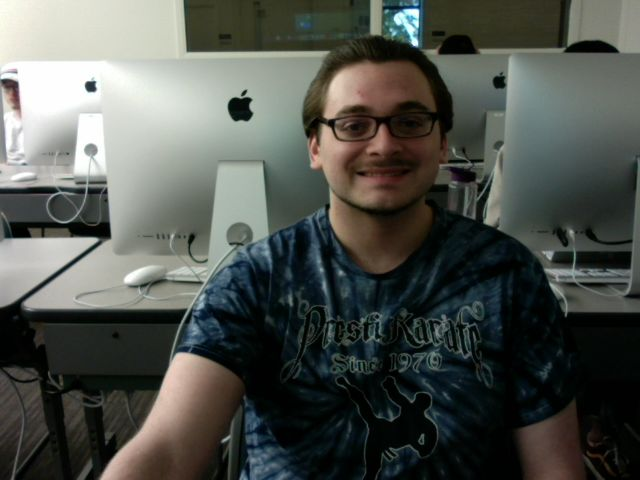

In [2]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [3]:
#get a picture of the falls
!wget 'https://www.niagarafallsstatepark.com/~/media/parks/niagara-falls/homepage/banner-niagara1.jpg'

--2022-10-24 17:00:29--  https://www.niagarafallsstatepark.com/~/media/parks/niagara-falls/homepage/banner-niagara1.jpg
Resolving www.niagarafallsstatepark.com (www.niagarafallsstatepark.com)... 54.146.70.8, 52.22.245.233
Connecting to www.niagarafallsstatepark.com (www.niagarafallsstatepark.com)|54.146.70.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118881 (116K) [image/jpeg]
Saving to: ‘banner-niagara1.jpg’

banner-niagara1.jpg 100%[===================>] 116.09K  --.-KB/s    in 0.06s   

2022-10-24 17:00:29 (1.95 MB/s) - ‘banner-niagara1.jpg’ saved [118881/118881]



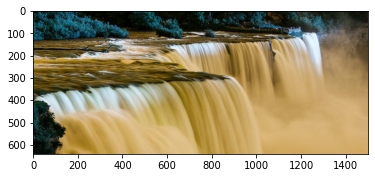

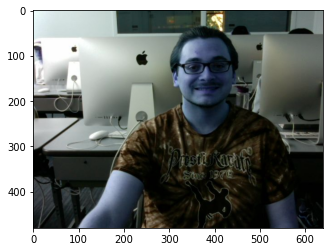

In [9]:
import cv2
import matplotlib.pyplot as plt
background = cv2.imread('banner-niagara1.jpg')
img = cv2.imread('photo.jpg')
plt.imshow(background)
plt.show()
plt.imshow(img)
plt.show()

In [8]:
#install cvzone
!pip install cvzone
!pip install mediapipe


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for cvzone: filename=cvzone-1.5.6-py3-none-any.whl size=18768 sha256=fed0bbd9a4b38e1efc47c0396e23394937fe426abf879953bf0dd9dfade6efd5
  Stored in directory: /root/.cache/pip/wheels/c1/e8/e9/80f482161ba9f5dcf4832b76ac70540edd11a3136a58445c52
Successfully built cvzone
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 1.6 MB/s 


In [12]:
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from cvzone import overlayPNG
import random
import imageio

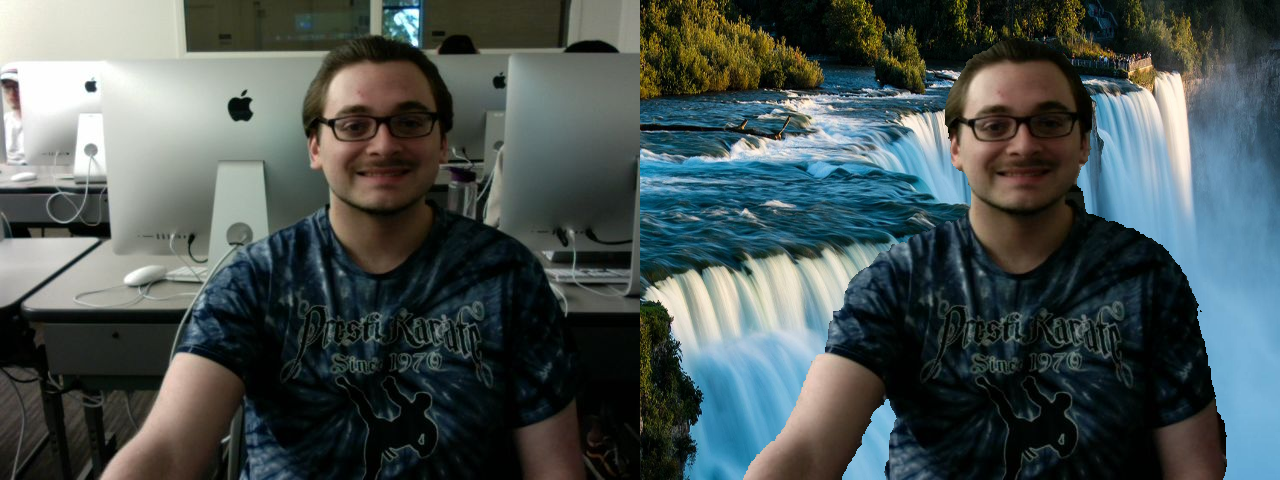

In [13]:
background = cv2.imread('banner-niagara1.jpg')
me = cv2.imread('photo.jpg')
background = cv2.resize(background, (me.shape[1], me.shape[0]))

segmentor = SelfiSegmentation()
imgOut = segmentor.removeBG(me, background, threshold=0.8)

#stacking the original image and the changed background image
imgStack = cvzone.stackImages([me, imgOut], 2, 1)
cv2_imshow(imgStack)